# Análisis de textos

Este trabajo realiza un análisis de texto en Python, centrado en la lectura, limpieza y comparación de dos textos. Incluye procesos de normalización de texto, como la eliminación de etiquetas HTML, URLs, signos de puntuación y espacios innecesarios, además de la conversión del texto a un formato uniforme para facilitar su análisis posterior. El objetivo es preparar los textos para un estudio comparativo de su estructura y contenido, aplicando técnicas básicas de procesamiento de lenguaje natural.

# Punto uno

In [28]:
# Abrir y leer Texto 1
with open(r"C:\Users\laura\Downloads\Texto 1.txt", "r", encoding="utf-8") as archivo1:
    texto1 = archivo1.read()

with open(r"C:\Users\laura\Downloads\Texto 2.txt", "r", encoding="utf-8") as archivo2:
    texto2 = archivo2.read()

# Mostrar los primeros caracteres de cada texto para verificar
print("Primeras líneas del Texto 1:\n", texto1[:300])
print("\n" + "-"*80 + "\n")
print("Primeras líneas del Texto 2:\n", texto2[:300])

Primeras líneas del Texto 1:
 El retrato oval - Edgar Allan Poe

El castillo al cual mi criado se había atrevido a entrar por la fuerza antes de permitir que, gravemente herido como estaba, pasara yo la noche al aire libre, era una de esas construcciones en las que se mezclan la lobreguez y la grandeza, y que durante largo tiemp

--------------------------------------------------------------------------------

Primeras líneas del Texto 2:
 El almohadón de plumas - Horacio Quiroga

Su luna de miel fue un largo escalofrío. Rubia, angelical y tímida, el carácter duro de su marido heló sus soñadas niñerías de novia. Ella lo quería mucho, sin embargo, a veces con un ligero estremecimiento cuando volviendo de noche juntos por la calle, echa


# Punto dos

In [29]:
import re
import string

# Normalizar texto 

def normalizar_texto(texto):
    # Eliminar etiquetas HTML
    texto = re.sub(r'<.*?>', '', texto)
    
    # Eliminar URLs
    texto = re.sub(r'http\S+|www\.\S+|https\S+', '', texto)
    
    # Eliminar puntuación 
    signos_extra = '¿?¡!.,;:"\'()[]{}…—–-'
    texto = texto.translate(str.maketrans('', '', string.punctuation + signos_extra))
    
    # Eliminar espacios
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    return texto

texto1_normalizado = normalizar_texto(texto1)
texto2_normalizado = normalizar_texto(texto2)

print("Texto 1 normalizado\n", texto1_normalizado[:300])
print("\n" + "-"*80 + "\n")
print("Texto 2 normalizado\n", texto2_normalizado[:300])



Texto 1 normalizado
 El retrato oval Edgar Allan Poe El castillo al cual mi criado se había atrevido a entrar por la fuerza antes de permitir que gravemente herido como estaba pasara yo la noche al aire libre era una de esas construcciones en las que se mezclan la lobreguez y la grandeza y que durante largo tiempo se ha

--------------------------------------------------------------------------------

Texto 2 normalizado
 El almohadón de plumas Horacio Quiroga Su luna de miel fue un largo escalofrío Rubia angelical y tímida el carácter duro de su marido heló sus soñadas niñerías de novia Ella lo quería mucho sin embargo a veces con un ligero estremecimiento cuando volviendo de noche juntos por la calle echaba una fur


# Punto tres

In [30]:
import re

# Leer los textos originales 
with open(r"C:\Users\laura\Downloads\Texto 1.txt", "r", encoding="utf-8") as archivo1:
    texto1 = archivo1.read()

with open(r"C:\Users\laura\Downloads\Texto 2.txt", "r", encoding="utf-8") as archivo2:
    texto2 = archivo2.read()

# Función para analizar párrafos, frases y palabras 
def analizar_texto(texto):
    # Contar párrafos: 
    parrafos = len(re.findall(r'\n\s*\n', texto)) + 1  
    
    # Contar frases: 
    frases = len(re.findall(r'[.!?]+', texto))
    
    # Contar palabras: 
    palabras = len(re.findall(r'\b[\wáéíóúÁÉÍÓÚñÑ]+\b', texto))
    
    return parrafos, frases, palabras

# Aplicar análisis a los textos originales 
parrafos1, frases1, palabras1 = analizar_texto(texto1)
parrafos2, frases2, palabras2 = analizar_texto(texto2)

# Mostrar resultados numéricos 
print(f"Texto 1 → Párrafos: {parrafos1}, Frases: {frases1}, Palabras: {palabras1}")
print(f"Texto 2 → Párrafos: {parrafos2}, Frases: {frases2}, Palabras: {palabras2}")

# Reflexión comparativa 
print("\nReflexión comparativa")

if palabras1 > palabras2:
    print(f"El Texto 1 es más extenso, con {palabras1} palabras frente a {palabras2} del Texto 2, lo que sugiere un desarrollo más amplio o detallado.")
elif palabras1 < palabras2:
    print(f"El Texto 2 es más extenso, con {palabras2} palabras frente a {palabras1} del Texto 1, indicando posiblemente una exposición más elaborada.")
else:
    print("Ambos textos tienen una extensión muy similar en cantidad de palabras.")

if frases1 > frases2:
    print("El Texto 1 contiene más frases, lo que puede reflejar un discurso más fragmentado o con mayor cantidad de ideas intermedias.")
elif frases1 < frases2:
    print("El Texto 2 presenta más frases, lo que sugiere un ritmo más fluido o explicativo.")
else:
    print("El número de frases en ambos textos es equivalente, lo que indica una estructura comparable.")

# Promedio de palabras por frase (indicador de complejidad sintáctica)
prom1 = palabras1 / max(frases1, 1)
prom2 = palabras2 / max(frases2, 1)

print(f"\nPromedio de palabras por frase:")
print(f"Texto 1: {prom1:.1f} palabras/frase")
print(f"Texto 2: {prom2:.1f} palabras/frase")

if prom1 > prom2:
    print("El Texto 1 tiende a usar frases más largas y posiblemente más complejas.")
elif prom1 < prom2:
    print("El Texto 2 presenta frases más cortas y directas, con una sintaxis más sencilla.")
else:
    print("Ambos textos muestran una complejidad sintáctica similar.")



Texto 1 → Párrafos: 10, Frases: 52, Palabras: 1235
Texto 2 → Párrafos: 32, Frases: 92, Palabras: 1221

Reflexión comparativa
El Texto 1 es más extenso, con 1235 palabras frente a 1221 del Texto 2, lo que sugiere un desarrollo más amplio o detallado.
El Texto 2 presenta más frases, lo que sugiere un ritmo más fluido o explicativo.

Promedio de palabras por frase:
Texto 1: 23.8 palabras/frase
Texto 2: 13.3 palabras/frase
El Texto 1 tiende a usar frases más largas y posiblemente más complejas.


Texto 1: 
El Texto 1 tiende a ser más complejo sintácticamente y probablemente más formal o descriptivo.

Texto 2:
El Texto 2 resulta más ágil y fragmentado, con una estructura más narrativa o introspectiva, en la que el flujo de ideas es más rápido.

In [31]:
!pip install spacy

In [32]:
!python -m spacy download es_core_news_sm


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.9 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/12.9 MB 4.0 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.9 MB 4.2 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.9 MB 4.2 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.9 MB 4.3 MB/s eta 0:00:02
     ----------------- ---------------------- 5.8/12.9 MB 4.6 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.9 MB 4.8 MB/s eta 0:00:02
     ------------------------- -------------- 8.1/12.9 MB 4.9 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.9 MB 5.1 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.9 MB 5.0 MB/s eta 0:00:01
     ---------------------------------- ----- 11.3/12.9 MB 4.9 MB

In [33]:
import spacy
nlp = spacy.load("es_core_news_sm")


In [34]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud

# Punto cuatro

Palabras más frecuentes en Texto 1:
 [('retrato', 9), ('pintura', 7), ('pintor', 6), ('hora', 5), ('profundo', 5), ('aposento', 4), ('torre', 4), ('luz', 4), ('caer', 4), ('ojo', 4)]

Palabras más frecuentes en Texto 2:
 [('alicia', 17), ('jordán', 15), ('mirar', 9), ('cama', 8), ('rato', 7), ('almohadón', 6), ('noche', 5), ('hora', 5), ('alfombra', 5), ('sirvienta', 5)]


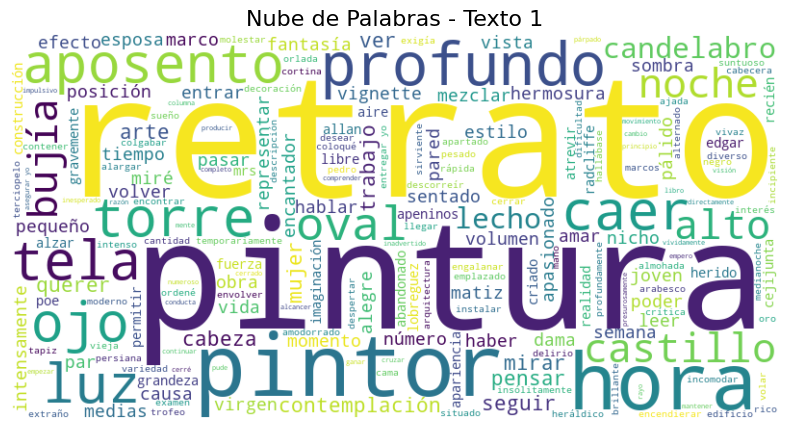

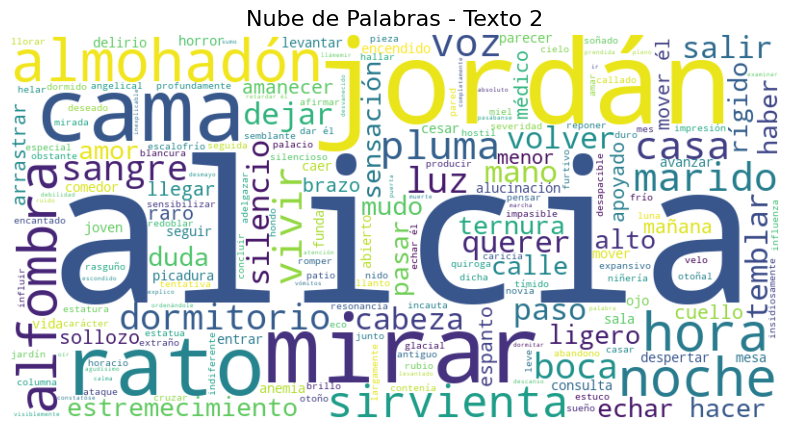

In [36]:
# Importar librerías 
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargar el modelo de spaCy en español 
nlp = spacy.load("es_core_news_sm")

# Leer los textos originales 
with open(r"C:\Users\laura\Downloads\Texto 1.txt", "r", encoding="utf-8") as archivo1:
    texto1 = archivo1.read()

with open(r"C:\Users\laura\Downloads\Texto 2.txt", "r", encoding="utf-8") as archivo2:
    texto2 = archivo2.read()

# Procesar los textos con spaCy 
doc1 = nlp(texto1)
doc2 = nlp(texto2)

# Tokenización + Remoción de stopwords + Lematización 
def limpiar_y_lemmatizar(doc):
    tokens_limpios = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha                     
        and not token.is_stop                
        and len(token) > 2                   
    ]
    return tokens_limpios

tokens1 = limpiar_y_lemmatizar(doc1)
tokens2 = limpiar_y_lemmatizar(doc2)

# Identificar las palabras más frecuentes 
frecuencias1 = Counter(tokens1)
frecuencias2 = Counter(tokens2)

print("Palabras más frecuentes en Texto 1:\n", frecuencias1.most_common(10))
print("\nPalabras más frecuentes en Texto 2:\n", frecuencias2.most_common(10))

# Generar nubes de palabras 
def generar_nube_palabras(frecuencias, titulo):
    nube = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    nube.generate_from_frequencies(frecuencias)
    plt.figure(figsize=(10,5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.show()

generar_nube_palabras(frecuencias1, "Nube de Palabras - Texto 1")
generar_nube_palabras(frecuencias2, "Nube de Palabras - Texto 2")


Texto 1: 
Los términos más frecuentes giran alrededor del arte pictórico y la observación visual.
Palabras como retrato, pintura, pintor, luz y ojo sugieren un texto centrado en la representación visual o artística, probablemente descriptivo o reflexivo sobre la pintura o el proceso creativo.
También aparecen palabras que aportan una atmósfera sensorial (profundo, aposento, hora, torre), reforzando la idea de un contexto visual e introspectivo.

Texto 2:
Aquí predominan nombres propios (Alicia, Jordán) y elementos domésticos o narrativos (cama, almohadón, alfombra), junto con acciones como mirar o referencias temporales (noche, hora).
Esto sugiere un texto narrativo o literario, probablemente un relato o cuento con ambiente interior.
Las palabras reflejan una historia entre personajes, situada en un espacio cerrado y con matices emocionales o simbólicos.

# Punto cinco

TEXTO 1 — SUSTANTIVOS: [('retrato', 8), ('pintura', 7), ('pintor', 6), ('hora', 5), ('aposento', 4), ('torre', 4), ('luz', 4), ('ojo', 4), ('tela', 4), ('castillo', 3)]
TEXTO 1 — VERBOS: [('caer', 4), ('pensar', 3), ('mirar', 3), ('querer', 3), ('ver', 3), ('seguir', 3), ('entrar', 2), ('pasar', 2), ('mezclar', 2), ('leer', 2)]
TEXTO 1 — ADJETIVOS: [('profundo', 4), ('pequeño', 2), ('alto', 2), ('sentado', 2), ('encantador', 2), ('apasionado', 2), ('pálido', 2), ('herido', 1), ('libre', 1), ('cejijunta', 1)]

------------------------------------------------------------------------------------------

TEXTO 2 — SUSTANTIVOS: [('cama', 8), ('almohadón', 6), ('rato', 6), ('hora', 5), ('alfombra', 5), ('sirvienta', 5), ('pluma', 4), ('marido', 4), ('noche', 4), ('voz', 4)]
TEXTO 2 — VERBOS: [('mirar', 9), ('vivir', 4), ('volver', 3), ('salir', 3), ('dejar', 3), ('temblar', 3), ('querer', 2), ('echar', 2), ('hacer', 2), ('pasar', 2)]
TEXTO 2 — ADJETIVOS: [('ligero', 2), ('alto', 2), ('rígido'

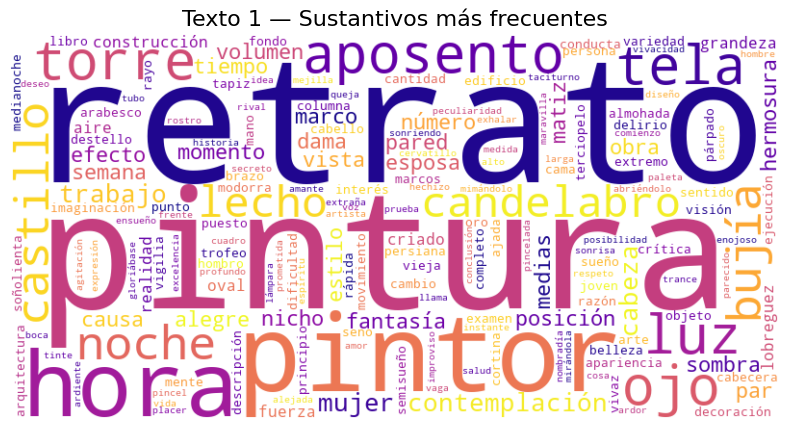

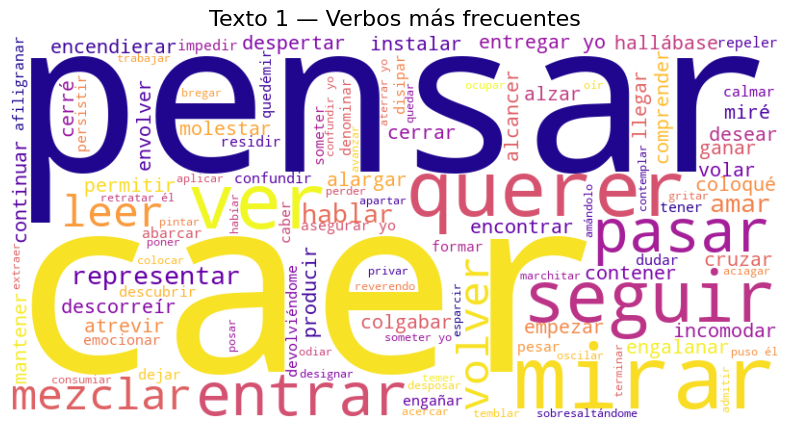

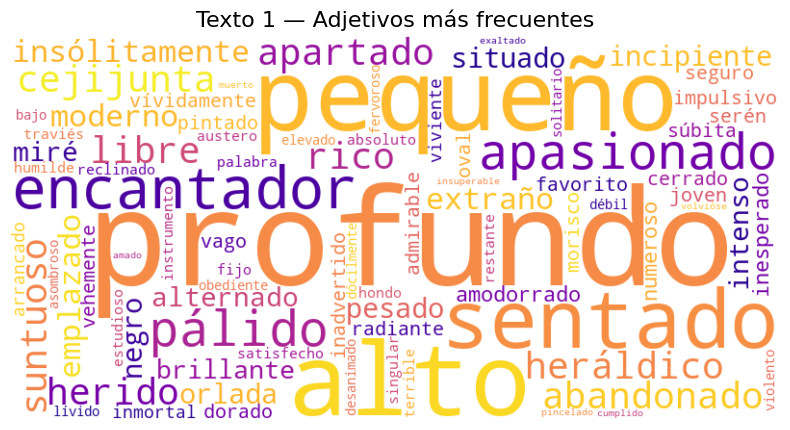

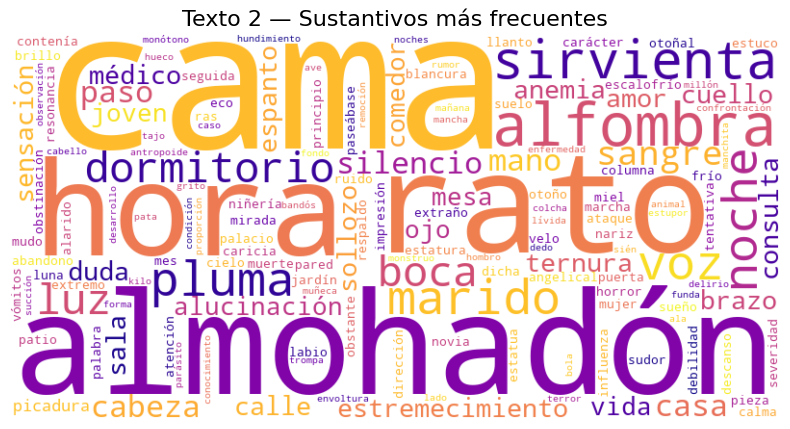

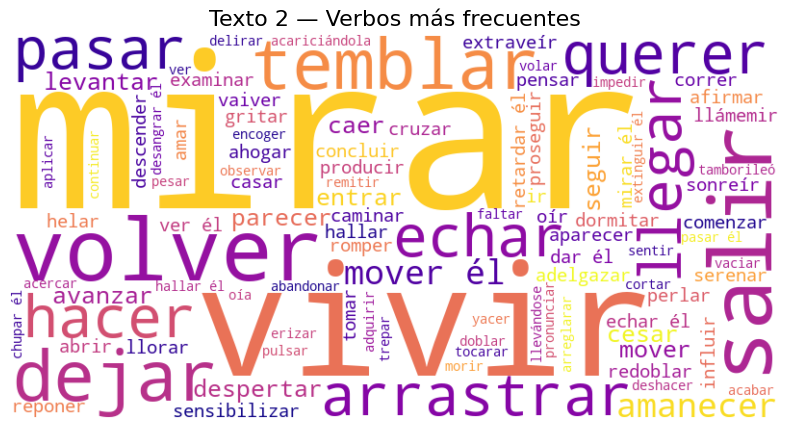

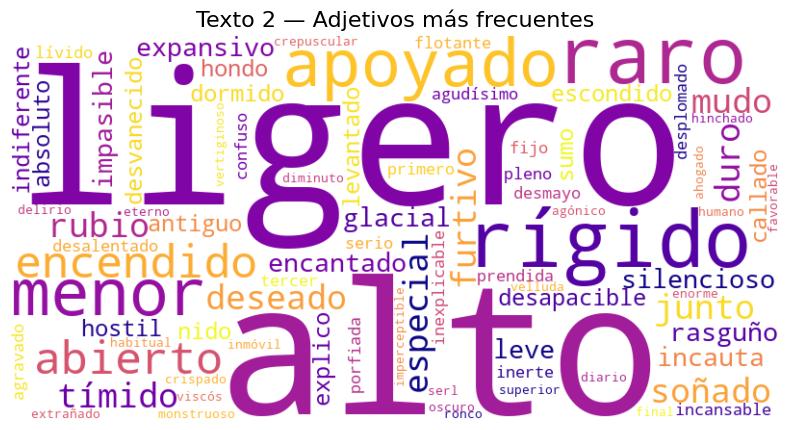

In [37]:

# Cargar el modelo de spaCy en español 
nlp = spacy.load("es_core_news_sm")

# Leer los textos originales 
with open(r"C:\Users\laura\Downloads\Texto 1.txt", "r", encoding="utf-8") as archivo1:
    texto1 = archivo1.read()

with open(r"C:\Users\laura\Downloads\Texto 2.txt", "r", encoding="utf-8") as archivo2:
    texto2 = archivo2.read()

# Procesar los textos con spaCy 
doc1 = nlp(texto1)
doc2 = nlp(texto2)

# Función para extraer palabras por categoría gramatical 
def extraer_palabras(doc, tipo):
    return [
        token.lemma_.lower()
        for token in doc
        if token.pos_ == tipo
        and token.is_alpha
        and not token.is_stop
        and len(token) > 2
    ]

# Obtener listas de sustantivos, verbos y adjetivos 
sustantivos1 = extraer_palabras(doc1, "NOUN")
verbos1 = extraer_palabras(doc1, "VERB")
adjetivos1 = extraer_palabras(doc1, "ADJ")

sustantivos2 = extraer_palabras(doc2, "NOUN")
verbos2 = extraer_palabras(doc2, "VERB")
adjetivos2 = extraer_palabras(doc2, "ADJ")

# Contar frecuencias 
def contar_frecuencias(lista):
    return Counter(lista)

freq_sust1 = contar_frecuencias(sustantivos1)
freq_verb1 = contar_frecuencias(verbos1)
freq_adj1 = contar_frecuencias(adjetivos1)

freq_sust2 = contar_frecuencias(sustantivos2)
freq_verb2 = contar_frecuencias(verbos2)
freq_adj2 = contar_frecuencias(adjetivos2)

# Mostrar las 10 palabras más frecuentes por tipo 
print("TEXTO 1 — SUSTANTIVOS:", freq_sust1.most_common(10))
print("TEXTO 1 — VERBOS:", freq_verb1.most_common(10))
print("TEXTO 1 — ADJETIVOS:", freq_adj1.most_common(10))
print("\n" + "-"*90 + "\n")
print("TEXTO 2 — SUSTANTIVOS:", freq_sust2.most_common(10))
print("TEXTO 2 — VERBOS:", freq_verb2.most_common(10))
print("TEXTO 2 — ADJETIVOS:", freq_adj2.most_common(10))

# Función para generar nubes por categoría 
def generar_nube(frecuencias, titulo):
    nube = WordCloud(width=800, height=400, background_color='white', colormap='plasma')
    nube.generate_from_frequencies(frecuencias)
    plt.figure(figsize=(10,5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.show()

# Generar nubes de palabras por tipo gramatical y texto 
generar_nube(freq_sust1, "Texto 1 — Sustantivos más frecuentes")
generar_nube(freq_verb1, "Texto 1 — Verbos más frecuentes")
generar_nube(freq_adj1, "Texto 1 — Adjetivos más frecuentes")

generar_nube(freq_sust2, "Texto 2 — Sustantivos más frecuentes")
generar_nube(freq_verb2, "Texto 2 — Verbos más frecuentes")
generar_nube(freq_adj2, "Texto 2 — Adjetivos más frecuentes")


Texto 1: 
El predominio de sustantivos asociados al arte y la observación (retrato, pintura, pintor) indica que el texto se centra en el acto de representar o contemplar. Los verbos expresan acciones mentales o perceptivas (pensar, mirar, ver, querer), lo que sugiere un tono introspectivo y contemplativo.
Por su parte, los adjetivos como profundo, encantador, pálido añaden matices estéticos y sensoriales, propios de una descripción artística.

Texto 2:
Aquí los sustantivos refieren a espacios domésticos y personajes, evidenciando una narrativa centrada en el hogar (cama, almohadón, sirvienta, marido). Los verbos describen acciones humanas y emocionales (mirar, temblar, querer, vivir), lo que sugiere tensión, afectividad y movimiento interno.
Los adjetivos agregan rasgos físicos y emocionales (rígido, tímido, abierto), reforzando la sensación de introspección y drama psicológico.

# Punto seis

In [38]:
# Cargar modelo de spaCy en español 
nlp = spacy.load("es_core_news_sm")

# Leer los textos originales 
with open(r"C:\Users\laura\Downloads\Texto 1.txt", "r", encoding="utf-8") as archivo1:
    texto1 = archivo1.read()

with open(r"C:\Users\laura\Downloads\Texto 2.txt", "r", encoding="utf-8") as archivo2:
    texto2 = archivo2.read()

# Función para extraer tripletas SVO
def extraer_svo(doc):
    tripletas = []
    for token in doc:
        # Buscamos verbos con sujeto y objeto dependientes
        if token.pos_ == "VERB":
            sujeto = None
            objeto = None
            
            # buscar sujeto nominal
            for hijo in token.children:
                if hijo.dep_ in ("nsubj", "nsubj_pass"):
                    sujeto = hijo.text
                if hijo.dep_ in ("obj", "dobj", "iobj"):
                    objeto = hijo.text
            
            if sujeto and objeto:
                tripletas.append((sujeto, token.lemma_, objeto))
    return tripletas

# Procesar los textos 
doc1 = nlp(texto1)
doc2 = nlp(texto2)

# Extraer tripletas 
tripletas1 = extraer_svo(doc1)
tripletas2 = extraer_svo(doc2)

# Mostrar ejemplos representativos 
print("Ejemplos de tripletas SVO — TEXTO 1:\n")
for t in tripletas1[:10]:
    print(t)

print("\n" + "-"*100 + "\n")

print("Ejemplos de tripletas SVO — TEXTO 2:\n")
for t in tripletas2[:10]:
    print(t)


Ejemplos de tripletas SVO — TEXTO 1:

('que', 'alzar', 'ciertas')
('que', 'engalanar', 'cantidad')
('pinturas', 'despertar', 'interés')
('que', 'encendierar', 'bujías')
('que', 'envolver', 'cama')
('que', 'contener', 'descripción')
('Rápidas', 'volar', 'horas')
('posición', 'molestar', 'me')
('cambio', 'producir', 'efecto')
('una', 'mantener', 'que')

----------------------------------------------------------------------------------------------------

Ejemplos de tripletas SVO — TEXTO 2:

('carácter', 'helar', 'niñerías')
('Ella', 'querer', 'lo')
('Él', 'amar', 'la')
('blancura', 'producir', 'impresión')
('brillo', 'afirmar', 'sensación')
('pasos', 'hallar', 'eco')
('abandono', 'sensibilizar', 'resonancia')
('Alicia', 'pasar', 'otoño')
('Alicia', 'tener', 'desmayos')
('alfombra', 'ahogar', 'pasos')


Texto 1: 
parece orientarse hacia una reflexión sobre el arte o la percepción visual, donde los objetos y las escenas provocan emociones o pensamientos. Se infiere una mirada analítica y contemplativa, más racional que narrativa.

Texto 2: 
enfatiza emociones humanas, con una carga subjetiva y afectiva. Se percibe una narración íntima, romántica o trágica, dominada por la sensación y el sentimiento antes que por la observación racional.